Analyze and plot cross picks from model trained on random selection and active learning selection sets
* Models were trained on all core 1 data from each set
* Selections were made from core 2 domain
* 8 alkyl bromides tested from active learning selections, 4 from random selections (due to random model not predicting very many with high yield)
* This approach tests model generalization to new cores and whether we can select alkyl bromides with consistently high yield for novel cores
* cross threshold for AL picks: AL model > 40, random model < 10
* cross threshold for random model picks: random model > 15, AL model < 10

In [2]:
import pandas as pd
from rdkit import Chem

import matplotlib.pyplot as plt
import seaborn as sns

Failed to find the pandas get_adjustment() function to patch
Failed to patch pandas - PandasTools will have limited functionality


In [3]:
df_cross = pd.read_excel("../data/experiment/crosspick_yield_data.xlsx")

In [4]:
df_cross.dropna(subset="INCHI", inplace=True)
df_cross.shape # 4 reactions were missing from original spreadsheet

(44, 16)

In [4]:
# merge experimental measurements with predictions
df_al = pd.read_csv("iterations/batch5_AL_cross_picks.csv")
df_rand = pd.read_csv("iterations/batch5_rand_cross_picks.csv")
domain = pd.read_csv("iterations/batch5_core2_domain_predictions.csv")
print(df_al.shape, df_rand.shape)

/tmp/ipykernel_64482/482143727.py:4: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  domain = pd.read_csv("/home/rickena1/modules/mcds-actlearn/notebooks/iterations/batch6_core2_domain_predictions.csv")


(115, 2140) (12, 2140)


In [5]:
domain["selection"].value_counts()

selection
cores2_test_2               45
cores2_test_1               45
cores2_active_learning_1    45
cores2_active_learning_2    44
Name: count, dtype: int64

In [6]:
(domain[domain["selection"].isin(["cores2_test_1", "cores2_test_2"])]["CAD Yield (%)"] > 10).value_counts()

CAD Yield (%)
False    69
True     21
Name: count, dtype: int64

In [8]:
df_cross["smiles"] = df_cross["INCHI"].apply(utils.inchi_to_smiles)
df_cross["inchikey"] = df_cross["smiles"].apply(utils.add_inchikeys)
df_cross["inchikey_short"] = df_cross["inchikey"].str.split("-").str[0]

In [10]:
df_crossk = df_cross.drop_duplicates(subset="INCHI")
df_crossk.shape

(44, 19)

In [11]:
print(len(df_crossk["INCHI"].unique()))

44


In [12]:
print(len(domain["inchikey_short"].unique()))
print(len(domain["inchikey"].unique()))
print(len(domain["smiles"].unique()))
print(len(df_cross["inchikey_short"].unique()))
print(domain.shape)

11104
11104
11104
44
(11104, 2150)


In [13]:
df_cross["inchikey_short"].isin(domain["inchikey_short"]).value_counts()

inchikey_short
True    44
Name: count, dtype: int64

In [14]:
dfm = df_cross[["inchikey_short", "CAD Percent Yield (%)"]].merge(domain.drop(columns=["Unnamed: 0"]), on="inchikey_short")
dfm

,inchikey_short,CAD Percent Yield (%),smiles,smiles_alkyl,smiles_aryl,rsmi,CAD Yield (%),selection,category,inchikey,...,f_Br_tm_water_electrophilic_loewdin,f_Br_tm_water_electrophilic_paboon,f_Br_tm_water_electrophilic_fasm,f_Br_tm_water_radical_mulliken,f_Br_tm_water_radical_loewdin,f_Br_tm_water_radical_paboon,f_Br_tm_water_radical_fasm,yield_al_pred,yield_rand_pred,yield_pred_diff
0,LOJMAJQYCBQXAA,15.167746,COCc1cccc(OC)c1CCCOc1cc(C)ccc1C,Cc1ccc(C)c(OCCCBr)c1,COCc1cccc(OC)c1Br,Cc1ccc(C)c(OCCCBr)c1.COCc1cccc(OC)c1Br>>COCc1c...,NaN,NaN,NaN,LOJMAJQYCBQXAA-UHFFFAOYNA-N,...,0.0246,0.0242,0.0416,0.1044,0.1007,0.0730,0.1159,51.035859,8.299100,42.736760
1,PJXFLBRAQVNIAO,61.600000,COc1cc(-n2ccnc2)ccc1CCCOc1cc(C)ccc1C,Cc1ccc(C)c(OCCCBr)c1,COc1cc(-n2ccnc2)ccc1Br,Cc1ccc(C)c(OCCCBr)c1.COc1cc(-n2ccnc2)ccc1Br>>C...,NaN,NaN,NaN,PJXFLBRAQVNIAO-UHFFFAOYNA-N,...,0.0246,0.0242,0.0416,0.1044,0.1007,0.0730,0.1159,48.909831,8.309226,40.600605
2,KFZNGAHPZHETMM,98.953330,COC(=O)c1cccc(CCCOc2cc(C)ccc2C)c1C,Cc1ccc(C)c(OCCCBr)c1,COC(=O)c1cccc(Br)c1C,Cc1ccc(C)c(OCCCBr)c1.COC(=O)c1cccc(Br)c1C>>COC...,NaN,NaN,NaN,KFZNGAHPZHETMM-UHFFFAOYNA-N,...,0.0246,0.0242,0.0416,0.1044,0.1007,0.0730,0.1159,51.155447,5.737346,45.418101
3,CAFIXIQHNZFUCN,80.206097,COC(=O)Cc1cc(F)cc(CCCOc2cc(C)ccc2C)c1,Cc1ccc(C)c(OCCCBr)c1,COC(=O)Cc1cc(F)cc(Br)c1,Cc1ccc(C)c(OCCCBr)c1.COC(=O)Cc1cc(F)cc(Br)c1>>...,NaN,NaN,NaN,CAFIXIQHNZFUCN-UHFFFAOYNA-N,...,0.0246,0.0242,0.0416,0.1044,0.1007,0.0730,0.1159,44.261536,5.576359,38.685177
4,DHWGYWACACPQKX,2.270256,COCc1cccc(OC)c1[C@H]1CO[C@@](Cn2cncn2)(c2ccc(C...,Clc1ccc(C2(Cn3cncn3)CC(Br)CO2)c(Cl)c1,COCc1cccc(OC)c1Br,Clc1ccc([C@@]2(Cn3cncn3)C[C@@H](Br)CO2)c(Cl)c1...,NaN,NaN,NaN,DHWGYWACACPQKX-ZHRRBRCNNA-N,...,0.0950,0.1001,0.0954,0.1042,0.0972,0.0893,0.1024,50.310896,9.456114,40.854782
5,SQJYQKGPAYVSSV,5.745452,COc1cc(-n2ccnc2)ccc1[C@H]1CO[C@@](Cn2cncn2)(c2...,Clc1ccc(C2(Cn3cncn3)CC(Br)CO2)c(Cl)c1,COc1cc(-n2ccnc2)ccc1Br,Clc1ccc([C@@]2(Cn3cncn3)C[C@@H](Br)CO2)c(Cl)c1...,NaN,NaN,NaN,SQJYQKGPAYVSSV-MWTRTKDXNA-N,...,0.0950,0.1001,0.0954,0.1042,0.0972,0.0893,0.1024,59.853290,8.893388,50.959903
6,ZQJGZVMRJVYRPJ,18.537679,COC(=O)c1cccc([C@H]2CO[C@@](Cn3cncn3)(c3ccc(Cl...,Clc1ccc(C2(Cn3cncn3)CC(Br)CO2)c(Cl)c1,COC(=O)c1cccc(Br)c1C,Clc1ccc([C@@]2(Cn3cncn3)C[C@@H](Br)CO2)c(Cl)c1...,NaN,NaN,NaN,ZQJGZVMRJVYRPJ-QRQCRPRQNA-N,...,0.0950,0.1001,0.0954,0.1042,0.0972,0.0893,0.1024,45.819834,4.291186,41.528648
7,TZMQJAJYPZGMAP,33.485768,COC(=O)Cc1cc(F)cc([C@H]2CO[C@@](Cn3cncn3)(c3cc...,Clc1ccc(C2(Cn3cncn3)CC(Br)CO2)c(Cl)c1,COC(=O)Cc1cc(F)cc(Br)c1,Clc1ccc([C@@]2(Cn3cncn3)C[C@@H](Br)CO2)c(Cl)c1...,NaN,NaN,NaN,TZMQJAJYPZGMAP-ZHRRBRCNNA-N,...,0.0950,0.1001,0.0954,0.1042,0.0972,0.0893,0.1024,42.300742,7.793267,34.507475
8,SUUPHXXDRIPOQP,26.691029,COCc1cccc(OC)c1CCCn1cnc2c1c(=O)n(C)c(=O)n2C,Cn1c(=O)c2c(ncn2CCCBr)n(C)c1=O,COCc1cccc(OC)c1Br,Cn1c(=O)c2c(ncn2CCCBr)n(C)c1=O.COCc1cccc(OC)c1...,NaN,NaN,NaN,SUUPHXXDRIPOQP-UHFFFAOYNA-N,...,0.0481,0.0506,0.0505,0.0559,0.0519,0.0486,0.0569,51.482717,8.249575,43.233143
9,GBOADKGKULHKOV,52.277875,COc1cc(-n2ccnc2)ccc1CCCn1cnc2c1c(=O)n(C)c(=O)n2C,Cn1c(=O)c2c(ncn2CCCBr)n(C)c1=O,COc1cc(-n2ccnc2)ccc1Br,Cn1c(=O)c2c(ncn2CCCBr)n(C)c1=O.COc1cc(-n2ccnc2...,NaN,NaN,NaN,GBOADKGKULHKOV-UHFFFAOYNA-N,...,0.0481,0.0506,0.0505,0.0559,0.0519,0.0486,0.0569,49.170674,8.365506,40.805168


In [15]:
# evaluate predicted vs actual yield
target_og = "CAD Yield (%)"
target = "CAD Percent Yield (%)"
al_col = "yield_al_pred"
rand_col = "yield_rand_pred"
dfm[target]

0      15.167746
1      61.600000
2      98.953330
3      80.206097
4       2.270256
5       5.745452
6      18.537679
7      33.485768
8      26.691029
9      52.277875
10    125.347806
11     94.810340
12      0.000000
13     70.939749
14      0.000000
15      0.000000
16     49.350550
17     72.328972
18    118.200000
19     78.000000
20      0.000000
21     57.713097
22    117.501266
23     15.041762
24     24.441727
25    101.284093
26     97.772883
27     18.223846
28     79.615480
29    124.890136
30     29.504539
31     92.000000
32      6.308289
33     66.000000
34    125.553191
35     97.773060
36      0.000000
37      0.000000
38      0.000000
39      0.000000
40      0.000000
41      0.000000
42      0.000000
43      0.000000
Name: CAD Percent Yield (%), dtype: float64

In [16]:
# Define % predictions correct for above and below 10% yield threshold
thresh = 10
dfm["exp_thresh"] = dfm[target] > thresh
dfm["al_thresh"] = dfm[al_col] > thresh
dfm["rand_thresh"] = dfm[rand_col] > thresh
dfm["al_correct"] = dfm["al_thresh"] == dfm["exp_thresh"]
dfm["rand_correct"] = dfm["rand_thresh"] == dfm["exp_thresh"]

In [17]:
dfm["al_correct"] = dfm["al_correct"].astype(int)
dfm["rand_correct"] = dfm["rand_correct"].astype(int)

In [18]:
dfm_alk = dfm[["smiles_alkyl", target, al_col, rand_col, "al_correct", "rand_correct"]].groupby("smiles_alkyl").mean()

In [19]:
dfm_alk

,CAD Percent Yield (%),yield_al_pred,yield_rand_pred,al_correct,rand_correct
smiles_alkyl,,,,,
CNC(=O)C(F)Br,0.000000,1.750778,17.780328,1.000000,0.000000
COC(CBr)c1ccc(Cl)cc1,17.734937,46.213452,6.800026,0.250000,0.750000
COc1ccc(C2=NCC(CBr)S2)cc1,74.243154,52.615944,7.406845,1.000000,0.000000
COc1ccc(NC(=O)CCBr)cc1,58.404788,48.761823,9.965509,0.666667,0.333333
Cc1ccc(C)c(OCCCBr)c1,63.981793,48.840668,6.980508,1.000000,0.000000
Clc1ccc(C2(Cn3cncn3)CC(Br)CO2)c(Cl)c1,15.009789,49.571190,7.608489,0.500000,0.500000
Cn1c(=O)c2c(ncn2CCCBr)n(C)c1=O,74.781763,49.409178,6.993010,1.000000,0.000000
O=C1CC(Br)c2ccccc21,0.000000,2.448238,17.663868,1.000000,0.000000
O=C1c2ccccc2C(=O)N1CCCCCCCCCCBr,60.752269,1.838899,32.110620,0.000000,1.000000


In [20]:
alk_picks = dfm_alk["yield_al_pred"] > 10
alk_picks

smiles_alkyl
CNC(=O)C(F)Br                            False
COC(CBr)c1ccc(Cl)cc1                      True
COc1ccc(C2=NCC(CBr)S2)cc1                 True
COc1ccc(NC(=O)CCBr)cc1                    True
Cc1ccc(C)c(OCCCBr)c1                      True
Clc1ccc(C2(Cn3cncn3)CC(Br)CO2)c(Cl)c1     True
Cn1c(=O)c2c(ncn2CCCBr)n(C)c1=O            True
O=C1CC(Br)c2ccccc21                      False
O=C1c2ccccc2C(=O)N1CCCCCCCCCCBr          False
O=c1n(CCBr)nc2ccccn12                     True
O=c1oc2ccccc2n1CCCBr                      True
OCCCCCCCCCBr                             False
Name: yield_al_pred, dtype: bool

In [21]:
dfm

,inchikey_short,CAD Percent Yield (%),smiles,smiles_alkyl,smiles_aryl,rsmi,CAD Yield (%),selection,category,inchikey,...,f_Br_tm_water_radical_paboon,f_Br_tm_water_radical_fasm,yield_al_pred,yield_rand_pred,yield_pred_diff,exp_thresh,al_thresh,rand_thresh,al_correct,rand_correct
0,LOJMAJQYCBQXAA,15.167746,COCc1cccc(OC)c1CCCOc1cc(C)ccc1C,Cc1ccc(C)c(OCCCBr)c1,COCc1cccc(OC)c1Br,Cc1ccc(C)c(OCCCBr)c1.COCc1cccc(OC)c1Br>>COCc1c...,NaN,NaN,NaN,LOJMAJQYCBQXAA-UHFFFAOYNA-N,...,0.0730,0.1159,51.035859,8.299100,42.736760,True,True,False,1,0
1,PJXFLBRAQVNIAO,61.600000,COc1cc(-n2ccnc2)ccc1CCCOc1cc(C)ccc1C,Cc1ccc(C)c(OCCCBr)c1,COc1cc(-n2ccnc2)ccc1Br,Cc1ccc(C)c(OCCCBr)c1.COc1cc(-n2ccnc2)ccc1Br>>C...,NaN,NaN,NaN,PJXFLBRAQVNIAO-UHFFFAOYNA-N,...,0.0730,0.1159,48.909831,8.309226,40.600605,True,True,False,1,0
2,KFZNGAHPZHETMM,98.953330,COC(=O)c1cccc(CCCOc2cc(C)ccc2C)c1C,Cc1ccc(C)c(OCCCBr)c1,COC(=O)c1cccc(Br)c1C,Cc1ccc(C)c(OCCCBr)c1.COC(=O)c1cccc(Br)c1C>>COC...,NaN,NaN,NaN,KFZNGAHPZHETMM-UHFFFAOYNA-N,...,0.0730,0.1159,51.155447,5.737346,45.418101,True,True,False,1,0
3,CAFIXIQHNZFUCN,80.206097,COC(=O)Cc1cc(F)cc(CCCOc2cc(C)ccc2C)c1,Cc1ccc(C)c(OCCCBr)c1,COC(=O)Cc1cc(F)cc(Br)c1,Cc1ccc(C)c(OCCCBr)c1.COC(=O)Cc1cc(F)cc(Br)c1>>...,NaN,NaN,NaN,CAFIXIQHNZFUCN-UHFFFAOYNA-N,...,0.0730,0.1159,44.261536,5.576359,38.685177,True,True,False,1,0
4,DHWGYWACACPQKX,2.270256,COCc1cccc(OC)c1[C@H]1CO[C@@](Cn2cncn2)(c2ccc(C...,Clc1ccc(C2(Cn3cncn3)CC(Br)CO2)c(Cl)c1,COCc1cccc(OC)c1Br,Clc1ccc([C@@]2(Cn3cncn3)C[C@@H](Br)CO2)c(Cl)c1...,NaN,NaN,NaN,DHWGYWACACPQKX-ZHRRBRCNNA-N,...,0.0893,0.1024,50.310896,9.456114,40.854782,False,True,False,0,1
5,SQJYQKGPAYVSSV,5.745452,COc1cc(-n2ccnc2)ccc1[C@H]1CO[C@@](Cn2cncn2)(c2...,Clc1ccc(C2(Cn3cncn3)CC(Br)CO2)c(Cl)c1,COc1cc(-n2ccnc2)ccc1Br,Clc1ccc([C@@]2(Cn3cncn3)C[C@@H](Br)CO2)c(Cl)c1...,NaN,NaN,NaN,SQJYQKGPAYVSSV-MWTRTKDXNA-N,...,0.0893,0.1024,59.853290,8.893388,50.959903,False,True,False,0,1
6,ZQJGZVMRJVYRPJ,18.537679,COC(=O)c1cccc([C@H]2CO[C@@](Cn3cncn3)(c3ccc(Cl...,Clc1ccc(C2(Cn3cncn3)CC(Br)CO2)c(Cl)c1,COC(=O)c1cccc(Br)c1C,Clc1ccc([C@@]2(Cn3cncn3)C[C@@H](Br)CO2)c(Cl)c1...,NaN,NaN,NaN,ZQJGZVMRJVYRPJ-QRQCRPRQNA-N,...,0.0893,0.1024,45.819834,4.291186,41.528648,True,True,False,1,0
7,TZMQJAJYPZGMAP,33.485768,COC(=O)Cc1cc(F)cc([C@H]2CO[C@@](Cn3cncn3)(c3cc...,Clc1ccc(C2(Cn3cncn3)CC(Br)CO2)c(Cl)c1,COC(=O)Cc1cc(F)cc(Br)c1,Clc1ccc([C@@]2(Cn3cncn3)C[C@@H](Br)CO2)c(Cl)c1...,NaN,NaN,NaN,TZMQJAJYPZGMAP-ZHRRBRCNNA-N,...,0.0893,0.1024,42.300742,7.793267,34.507475,True,True,False,1,0
8,SUUPHXXDRIPOQP,26.691029,COCc1cccc(OC)c1CCCn1cnc2c1c(=O)n(C)c(=O)n2C,Cn1c(=O)c2c(ncn2CCCBr)n(C)c1=O,COCc1cccc(OC)c1Br,Cn1c(=O)c2c(ncn2CCCBr)n(C)c1=O.COCc1cccc(OC)c1...,NaN,NaN,NaN,SUUPHXXDRIPOQP-UHFFFAOYNA-N,...,0.0486,0.0569,51.482717,8.249575,43.233143,True,True,False,1,0
9,GBOADKGKULHKOV,52.277875,COc1cc(-n2ccnc2)ccc1CCCn1cnc2c1c(=O)n(C)c(=O)n2C,Cn1c(=O)c2c(ncn2CCCBr)n(C)c1=O,COc1cc(-n2ccnc2)ccc1Br,Cn1c(=O)c2c(ncn2CCCBr)n(C)c1=O.COc1cc(-n2ccnc2...,NaN,NaN,NaN,GBOADKGKULHKOV-UHFFFAOYNA-N,...,0.0486,0.0569,49.170674,8.365506,40.805168,True,True,False,1,0


In [22]:
pd.DataFrame(alk_picks)

,yield_al_pred
smiles_alkyl,
CNC(=O)C(F)Br,False
COC(CBr)c1ccc(Cl)cc1,True
COc1ccc(C2=NCC(CBr)S2)cc1,True
COc1ccc(NC(=O)CCBr)cc1,True
Cc1ccc(C)c(OCCCBr)c1,True
Clc1ccc(C2(Cn3cncn3)CC(Br)CO2)c(Cl)c1,True
Cn1c(=O)c2c(ncn2CCCBr)n(C)c1=O,True
O=C1CC(Br)c2ccccc21,False
O=C1c2ccccc2C(=O)N1CCCCCCCCCCBr,False


In [23]:
dfm.merge(pd.DataFrame(alk_picks).rename(columns={"yield_al_pred":"al_pick"}), left_on="smiles_alkyl", right_index=True)

,inchikey_short,CAD Percent Yield (%),smiles,smiles_alkyl,smiles_aryl,rsmi,CAD Yield (%),selection,category,inchikey,...,f_Br_tm_water_radical_fasm,yield_al_pred,yield_rand_pred,yield_pred_diff,exp_thresh,al_thresh,rand_thresh,al_correct,rand_correct,al_pick
0,LOJMAJQYCBQXAA,15.167746,COCc1cccc(OC)c1CCCOc1cc(C)ccc1C,Cc1ccc(C)c(OCCCBr)c1,COCc1cccc(OC)c1Br,Cc1ccc(C)c(OCCCBr)c1.COCc1cccc(OC)c1Br>>COCc1c...,NaN,NaN,NaN,LOJMAJQYCBQXAA-UHFFFAOYNA-N,...,0.1159,51.035859,8.299100,42.736760,True,True,False,1,0,True
1,PJXFLBRAQVNIAO,61.600000,COc1cc(-n2ccnc2)ccc1CCCOc1cc(C)ccc1C,Cc1ccc(C)c(OCCCBr)c1,COc1cc(-n2ccnc2)ccc1Br,Cc1ccc(C)c(OCCCBr)c1.COc1cc(-n2ccnc2)ccc1Br>>C...,NaN,NaN,NaN,PJXFLBRAQVNIAO-UHFFFAOYNA-N,...,0.1159,48.909831,8.309226,40.600605,True,True,False,1,0,True
2,KFZNGAHPZHETMM,98.953330,COC(=O)c1cccc(CCCOc2cc(C)ccc2C)c1C,Cc1ccc(C)c(OCCCBr)c1,COC(=O)c1cccc(Br)c1C,Cc1ccc(C)c(OCCCBr)c1.COC(=O)c1cccc(Br)c1C>>COC...,NaN,NaN,NaN,KFZNGAHPZHETMM-UHFFFAOYNA-N,...,0.1159,51.155447,5.737346,45.418101,True,True,False,1,0,True
3,CAFIXIQHNZFUCN,80.206097,COC(=O)Cc1cc(F)cc(CCCOc2cc(C)ccc2C)c1,Cc1ccc(C)c(OCCCBr)c1,COC(=O)Cc1cc(F)cc(Br)c1,Cc1ccc(C)c(OCCCBr)c1.COC(=O)Cc1cc(F)cc(Br)c1>>...,NaN,NaN,NaN,CAFIXIQHNZFUCN-UHFFFAOYNA-N,...,0.1159,44.261536,5.576359,38.685177,True,True,False,1,0,True
4,DHWGYWACACPQKX,2.270256,COCc1cccc(OC)c1[C@H]1CO[C@@](Cn2cncn2)(c2ccc(C...,Clc1ccc(C2(Cn3cncn3)CC(Br)CO2)c(Cl)c1,COCc1cccc(OC)c1Br,Clc1ccc([C@@]2(Cn3cncn3)C[C@@H](Br)CO2)c(Cl)c1...,NaN,NaN,NaN,DHWGYWACACPQKX-ZHRRBRCNNA-N,...,0.1024,50.310896,9.456114,40.854782,False,True,False,0,1,True
5,SQJYQKGPAYVSSV,5.745452,COc1cc(-n2ccnc2)ccc1[C@H]1CO[C@@](Cn2cncn2)(c2...,Clc1ccc(C2(Cn3cncn3)CC(Br)CO2)c(Cl)c1,COc1cc(-n2ccnc2)ccc1Br,Clc1ccc([C@@]2(Cn3cncn3)C[C@@H](Br)CO2)c(Cl)c1...,NaN,NaN,NaN,SQJYQKGPAYVSSV-MWTRTKDXNA-N,...,0.1024,59.853290,8.893388,50.959903,False,True,False,0,1,True
6,ZQJGZVMRJVYRPJ,18.537679,COC(=O)c1cccc([C@H]2CO[C@@](Cn3cncn3)(c3ccc(Cl...,Clc1ccc(C2(Cn3cncn3)CC(Br)CO2)c(Cl)c1,COC(=O)c1cccc(Br)c1C,Clc1ccc([C@@]2(Cn3cncn3)C[C@@H](Br)CO2)c(Cl)c1...,NaN,NaN,NaN,ZQJGZVMRJVYRPJ-QRQCRPRQNA-N,...,0.1024,45.819834,4.291186,41.528648,True,True,False,1,0,True
7,TZMQJAJYPZGMAP,33.485768,COC(=O)Cc1cc(F)cc([C@H]2CO[C@@](Cn3cncn3)(c3cc...,Clc1ccc(C2(Cn3cncn3)CC(Br)CO2)c(Cl)c1,COC(=O)Cc1cc(F)cc(Br)c1,Clc1ccc([C@@]2(Cn3cncn3)C[C@@H](Br)CO2)c(Cl)c1...,NaN,NaN,NaN,TZMQJAJYPZGMAP-ZHRRBRCNNA-N,...,0.1024,42.300742,7.793267,34.507475,True,True,False,1,0,True
8,SUUPHXXDRIPOQP,26.691029,COCc1cccc(OC)c1CCCn1cnc2c1c(=O)n(C)c(=O)n2C,Cn1c(=O)c2c(ncn2CCCBr)n(C)c1=O,COCc1cccc(OC)c1Br,Cn1c(=O)c2c(ncn2CCCBr)n(C)c1=O.COCc1cccc(OC)c1...,NaN,NaN,NaN,SUUPHXXDRIPOQP-UHFFFAOYNA-N,...,0.0569,51.482717,8.249575,43.233143,True,True,False,1,0,True
9,GBOADKGKULHKOV,52.277875,COc1cc(-n2ccnc2)ccc1CCCn1cnc2c1c(=O)n(C)c(=O)n2C,Cn1c(=O)c2c(ncn2CCCBr)n(C)c1=O,COc1cc(-n2ccnc2)ccc1Br,Cn1c(=O)c2c(ncn2CCCBr)n(C)c1=O.COc1cc(-n2ccnc2...,NaN,NaN,NaN,GBOADKGKULHKOV-UHFFFAOYNA-N,...,0.0569,49.170674,8.365506,40.805168,True,True,False,1,0,True


In [24]:
dfm["smiles_alkyl"].unique()

array(['Cc1ccc(C)c(OCCCBr)c1', 'Clc1ccc(C2(Cn3cncn3)CC(Br)CO2)c(Cl)c1',
       'Cn1c(=O)c2c(ncn2CCCBr)n(C)c1=O', 'COC(CBr)c1ccc(Cl)cc1',
       'O=c1oc2ccccc2n1CCCBr', 'COc1ccc(NC(=O)CCBr)cc1',
       'O=c1n(CCBr)nc2ccccn12', 'COc1ccc(C2=NCC(CBr)S2)cc1',
       'O=C1c2ccccc2C(=O)N1CCCCCCCCCCBr', 'OCCCCCCCCCBr', 'CNC(=O)C(F)Br',
       'O=C1CC(Br)c2ccccc21'], dtype=object)

In [25]:
yield_grid_al = dfm.pivot(index='smiles_alkyl', columns='smiles_aryl', values="CAD Percent Yield (%)")
yield_grid_al = yield_grid_al.reindex(dfm["smiles_alkyl"].unique())
yield_grid_al

smiles_aryl,COC(=O)Cc1cc(F)cc(Br)c1,COC(=O)c1cccc(Br)c1C,COCc1cccc(OC)c1Br,COc1cc(-n2ccnc2)ccc1Br
smiles_alkyl,,,,
Cc1ccc(C)c(OCCCBr)c1,80.206097,98.953330,15.167746,61.600000
Clc1ccc(C2(Cn3cncn3)CC(Br)CO2)c(Cl)c1,33.485768,18.537679,2.270256,5.745452
Cn1c(=O)c2c(ncn2CCCBr)n(C)c1=O,94.810340,125.347806,26.691029,52.277875
COC(CBr)c1ccc(Cl)cc1,0.000000,0.000000,0.000000,70.939749
O=c1oc2ccccc2n1CCCBr,78.000000,118.200000,49.350550,72.328972
COc1ccc(NC(=O)CCBr)cc1,117.501266,NaN,0.000000,57.713097
O=c1n(CCBr)nc2ccccn12,97.772883,101.284093,15.041762,24.441727
COc1ccc(C2=NCC(CBr)S2)cc1,124.890136,79.615480,NaN,18.223846
O=C1c2ccccc2C(=O)N1CCCCCCCCCCBr,NaN,NaN,29.504539,92.000000


In [27]:
yield_avg = yield_grid_al.mean(axis=1)
yield_avg.to_csv("iterations/batch5_AL_cross_yield_avg.csv")

In [24]:
yield_grid_al = dfm.pivot(index='smiles_alkyl', columns='smiles_aryl', values="al_correct")
yield_grid_al = yield_grid_al.reindex(dfm["smiles_alkyl"].unique())
yield_grid_al

smiles_aryl,COC(=O)Cc1cc(F)cc(Br)c1,COC(=O)c1cccc(Br)c1C,COCc1cccc(OC)c1Br,COc1cc(-n2ccnc2)ccc1Br
smiles_alkyl,,,,
Cc1ccc(C)c(OCCCBr)c1,1.0,1.0,1.0,1.0
Clc1ccc(C2(Cn3cncn3)CC(Br)CO2)c(Cl)c1,1.0,1.0,0.0,0.0
Cn1c(=O)c2c(ncn2CCCBr)n(C)c1=O,1.0,1.0,1.0,1.0
COC(CBr)c1ccc(Cl)cc1,0.0,0.0,0.0,1.0
O=c1oc2ccccc2n1CCCBr,1.0,1.0,1.0,1.0
COc1ccc(NC(=O)CCBr)cc1,1.0,NaN,0.0,1.0
O=c1n(CCBr)nc2ccccn12,1.0,1.0,1.0,1.0
COc1ccc(C2=NCC(CBr)S2)cc1,1.0,1.0,NaN,1.0
O=C1c2ccccc2C(=O)N1CCCCCCCCCCBr,NaN,NaN,0.0,0.0


In [25]:
yield_grid_rand = dfm.pivot(index='smiles_alkyl', columns='smiles_aryl', values="rand_correct")
yield_grid_rand = yield_grid_rand.reindex(dfm["smiles_alkyl"].unique())
yield_grid_rand

smiles_aryl,COC(=O)Cc1cc(F)cc(Br)c1,COC(=O)c1cccc(Br)c1C,COCc1cccc(OC)c1Br,COc1cc(-n2ccnc2)ccc1Br
smiles_alkyl,,,,
Cc1ccc(C)c(OCCCBr)c1,0.0,0.0,0.0,0.0
Clc1ccc(C2(Cn3cncn3)CC(Br)CO2)c(Cl)c1,0.0,0.0,1.0,1.0
Cn1c(=O)c2c(ncn2CCCBr)n(C)c1=O,0.0,0.0,0.0,0.0
COC(CBr)c1ccc(Cl)cc1,1.0,1.0,1.0,0.0
O=c1oc2ccccc2n1CCCBr,0.0,0.0,0.0,0.0
COc1ccc(NC(=O)CCBr)cc1,0.0,NaN,0.0,1.0
O=c1n(CCBr)nc2ccccn12,0.0,1.0,0.0,1.0
COc1ccc(C2=NCC(CBr)S2)cc1,0.0,0.0,NaN,0.0
O=C1c2ccccc2C(=O)N1CCCCCCCCCCBr,NaN,NaN,1.0,1.0


* alkyl bromides should be on y axis
* show heat maps side by side
* sort alkyl bromides by which model picked them (first 8 for AL, last 4 for random)
* ideally axes should show chemical structures --> is there going to be enough spaces?
* want a legend rather than a color bar, and want to show a shape or texture over the inactive squares (like an X)

In [16]:
plt.rcParams.update({"font.size":14})

In [27]:
yield_grid_al.columns = ["E1", "E2", "E3", "E4"]
yield_grid_rand.columns = ["E1", "E2", "E3", "E4"]
yield_grid_al

,E1,E2,E3,E4
smiles_alkyl,,,,
Cc1ccc(C)c(OCCCBr)c1,1.0,1.0,1.0,1.0
Clc1ccc(C2(Cn3cncn3)CC(Br)CO2)c(Cl)c1,1.0,1.0,0.0,0.0
Cn1c(=O)c2c(ncn2CCCBr)n(C)c1=O,1.0,1.0,1.0,1.0
COC(CBr)c1ccc(Cl)cc1,0.0,0.0,0.0,1.0
O=c1oc2ccccc2n1CCCBr,1.0,1.0,1.0,1.0
COc1ccc(NC(=O)CCBr)cc1,1.0,NaN,0.0,1.0
O=c1n(CCBr)nc2ccccn12,1.0,1.0,1.0,1.0
COc1ccc(C2=NCC(CBr)S2)cc1,1.0,1.0,NaN,1.0
O=C1c2ccccc2C(=O)N1CCCCCCCCCCBr,NaN,NaN,0.0,0.0


In [28]:
picks_idx = ["AL%s" % i for i in range(1,9)] + ["R%s" % i for i in range(1,5)]
yield_grid_al_num = yield_grid_al.copy()
yield_grid_al_num.index = picks_idx

yield_grid_rand_num = yield_grid_rand.copy()
yield_grid_rand_num.index = picks_idx


In [14]:
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
import matplotlib.patches as patches 

In [32]:
yield_grid_al_num.loc["AL8", "E3"] = 0
yield_grid_rand_num.loc["AL8", "E3"] = 1
yield_grid_al_num

,E1,E2,E3,E4
AL1,1.0,1.0,1.0,1.0
AL2,1.0,1.0,0.0,0.0
AL3,1.0,1.0,1.0,1.0
AL4,0.0,0.0,0.0,1.0
AL5,1.0,1.0,1.0,1.0
AL6,1.0,NaN,0.0,1.0
AL7,1.0,1.0,1.0,1.0
AL8,1.0,1.0,0.0,1.0
R1,NaN,NaN,0.0,0.0
R2,0.0,1.0,1.0,1.0


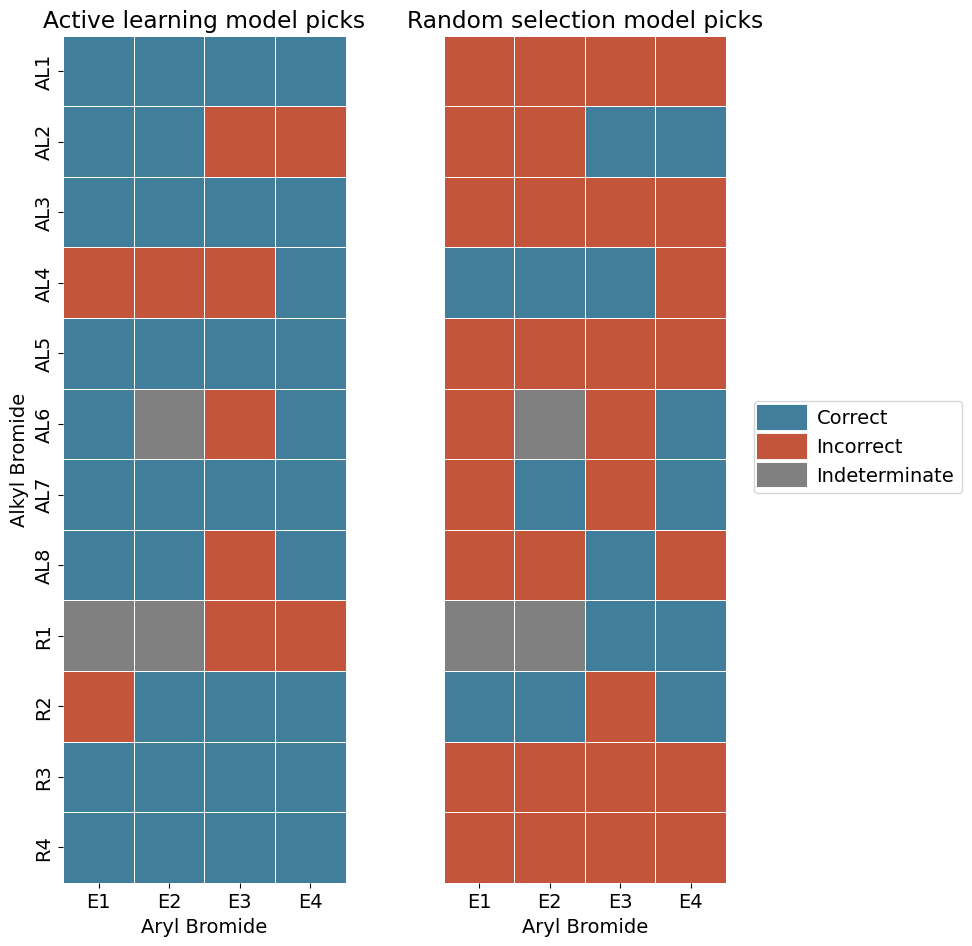

In [51]:
f, ax = plt.subplots(1, 2, figsize=(9, 11))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(20, 230, as_cmap=True)

plt.subplot(1, 2, 1)
ax = sns.heatmap(yield_grid_al_num, cmap=cmap, vmax=1.0, center=0.5, cbar=False,
            square=True, linewidths=.5) #, cbar_kws={"shrink": .5})
plt.ylabel("Alkyl Bromide")
plt.xlabel("Aryl Bromide")
plt.title("Active learning model picks")
ax.set_facecolor('grey')

plt.subplot(1, 2, 2)
frame2 = sns.heatmap(yield_grid_rand_num, cmap=cmap, vmax=1.0, center=0.5, cbar=False,
            square=True, linewidths=.5) #, cbar_kws={"shrink": .5})
plt.ylabel("")
plt.xlabel("Aryl Bromide")
frame2.axes.get_yaxis().set_visible(False)
plt.title("Random selection model picks")
frame2.set_facecolor('grey')

legend_elements = [patches.Rectangle([-0.1,0], 1, 2, color=[0.25093354, 0.49441433, 0.61041703, 1.], lw=8, label='Correct'),
                   patches.Rectangle([0.1,0], 1, 2, color=[0.7634747, 0.33484566, 0.2258923, 1.], lw=8, label='Incorrect'),
                   patches.Rectangle([0.3,0], 1, 2, color=[0.5, 0.5, 0.5, 1.0], lw=8, label='Indeterminate'),
]

frame2.legend(handles=legend_elements, loc=(1.1, 0.46))

#plt.show()
plt.savefig("images/cross_picks_heatmap.png", bbox_inches="tight")


In [33]:
yield_grid_al.to_csv("figure_data/cross_picks_AL_heatmap.csv")
yield_grid_rand.to_csv("figure_data/cross_picks_rand_heatmap.csv")

In [7]:
yield_grid_al = pd.read_csv("figure_data/cross_picks_AL_heatmap.csv", index_col=0)
yield_grid_rand = pd.read_csv("figure_data/cross_picks_rand_heatmap.csv", index_col=0)

In [40]:
print(cmap.get_over())
print(cmap.get_under())

[0.25093354 0.49441433 0.61041703 1.        ]
[0.7634747  0.33484566 0.2258923  1.        ]


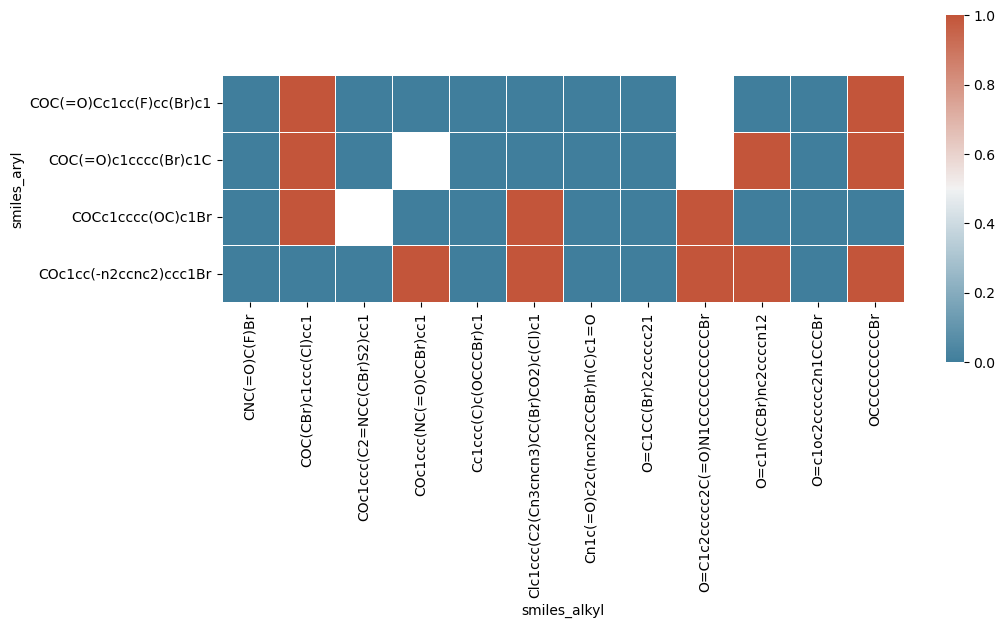

In [22]:
yield_grid_rand = dfm.pivot(index='smiles_aryl', columns='smiles_alkyl', values="rand_correct")
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(yield_grid_rand, cmap=cmap, vmax=1.0, center=0.5,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

In [42]:
# what fraction of reactions from each selection strategy had yield > 10%?

#def label_selection(row):
#    if row["yield_al_pred"] 

dfm_alk["AL_set"] = dfm_alk["yield_al_pred"] > 10
dfm_alk

,CAD Percent Yield (%),yield_al_pred,yield_rand_pred,al_correct,rand_correct,AL_set
smiles_alkyl,,,,,,
CNC(=O)C(F)Br,0.000000,1.750778,17.780328,1.000000,0.000000,False
COC(CBr)c1ccc(Cl)cc1,17.734937,46.213452,6.800026,0.250000,0.750000,True
COc1ccc(C2=NCC(CBr)S2)cc1,74.243154,52.615944,7.406845,1.000000,0.000000,True
COc1ccc(NC(=O)CCBr)cc1,58.404788,48.761823,9.965509,0.666667,0.333333,True
Cc1ccc(C)c(OCCCBr)c1,63.981793,48.840668,6.980508,1.000000,0.000000,True
Clc1ccc(C2(Cn3cncn3)CC(Br)CO2)c(Cl)c1,15.009789,49.571190,7.608489,0.500000,0.500000,True
Cn1c(=O)c2c(ncn2CCCBr)n(C)c1=O,74.781763,49.409178,6.993010,1.000000,0.000000,True
O=C1CC(Br)c2ccccc21,0.000000,2.448238,17.663868,1.000000,0.000000,False
O=C1c2ccccc2C(=O)N1CCCCCCCCCCBr,60.752269,1.838899,32.110620,0.000000,1.000000,False


In [43]:
al_smiles = list(dfm_alk[dfm_alk["AL_set"]].index)
rand_smiles = list(dfm_alk[~dfm_alk["AL_set"]].index)
al_smiles

['COC(CBr)c1ccc(Cl)cc1',
 'COc1ccc(C2=NCC(CBr)S2)cc1',
 'COc1ccc(NC(=O)CCBr)cc1',
 'Cc1ccc(C)c(OCCCBr)c1',
 'Clc1ccc(C2(Cn3cncn3)CC(Br)CO2)c(Cl)c1',
 'Cn1c(=O)c2c(ncn2CCCBr)n(C)c1=O',
 'O=c1n(CCBr)nc2ccccn12',
 'O=c1oc2ccccc2n1CCCBr']

In [44]:
rand_smiles

['CNC(=O)C(F)Br',
 'O=C1CC(Br)c2ccccc21',
 'O=C1c2ccccc2C(=O)N1CCCCCCCCCCBr',
 'OCCCCCCCCCBr']

In [45]:
dfm_al = dfm[dfm["smiles_alkyl"].isin(al_smiles)]
dfm_rand = dfm[dfm["smiles_alkyl"].isin(rand_smiles)]
print(dfm.shape, dfm_al.shape, dfm_rand.shape)

(44, 2155) (30, 2155) (14, 2155)


In [46]:
print(dfm_al[dfm_al["CAD Percent Yield (%)"] > 10].shape)
print(dfm_rand[dfm_rand["CAD Percent Yield (%)"] > 10].shape)

(24, 2155)
(5, 2155)


In [47]:
print(24/30, 5/14)

0.8 0.35714285714285715


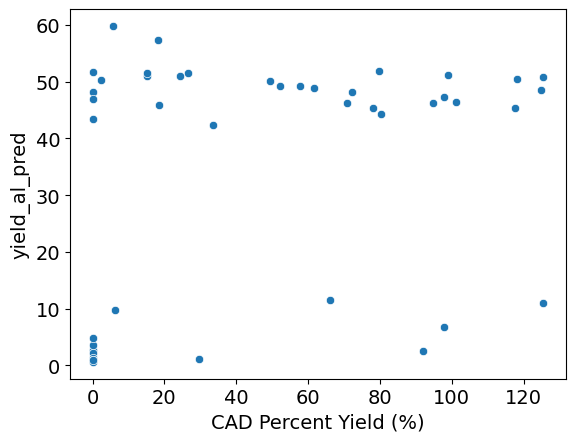

In [48]:
# what's a good visualization for this data?
sns.scatterplot(data=dfm, x=target, y=al_col)
plt.show()

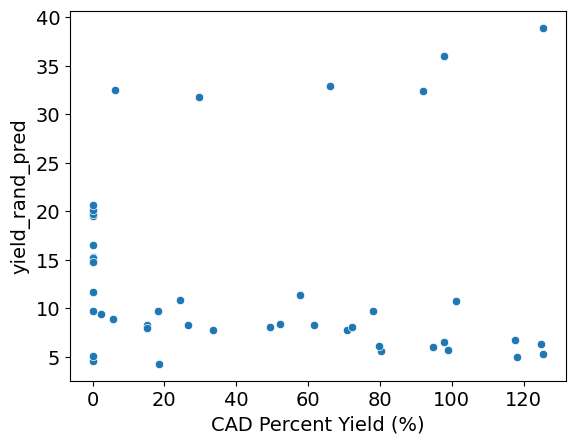

In [49]:
sns.scatterplot(data=dfm, x=target, y=rand_col)
plt.show()

In [50]:
plt.rcParams.update({"font.size":14})

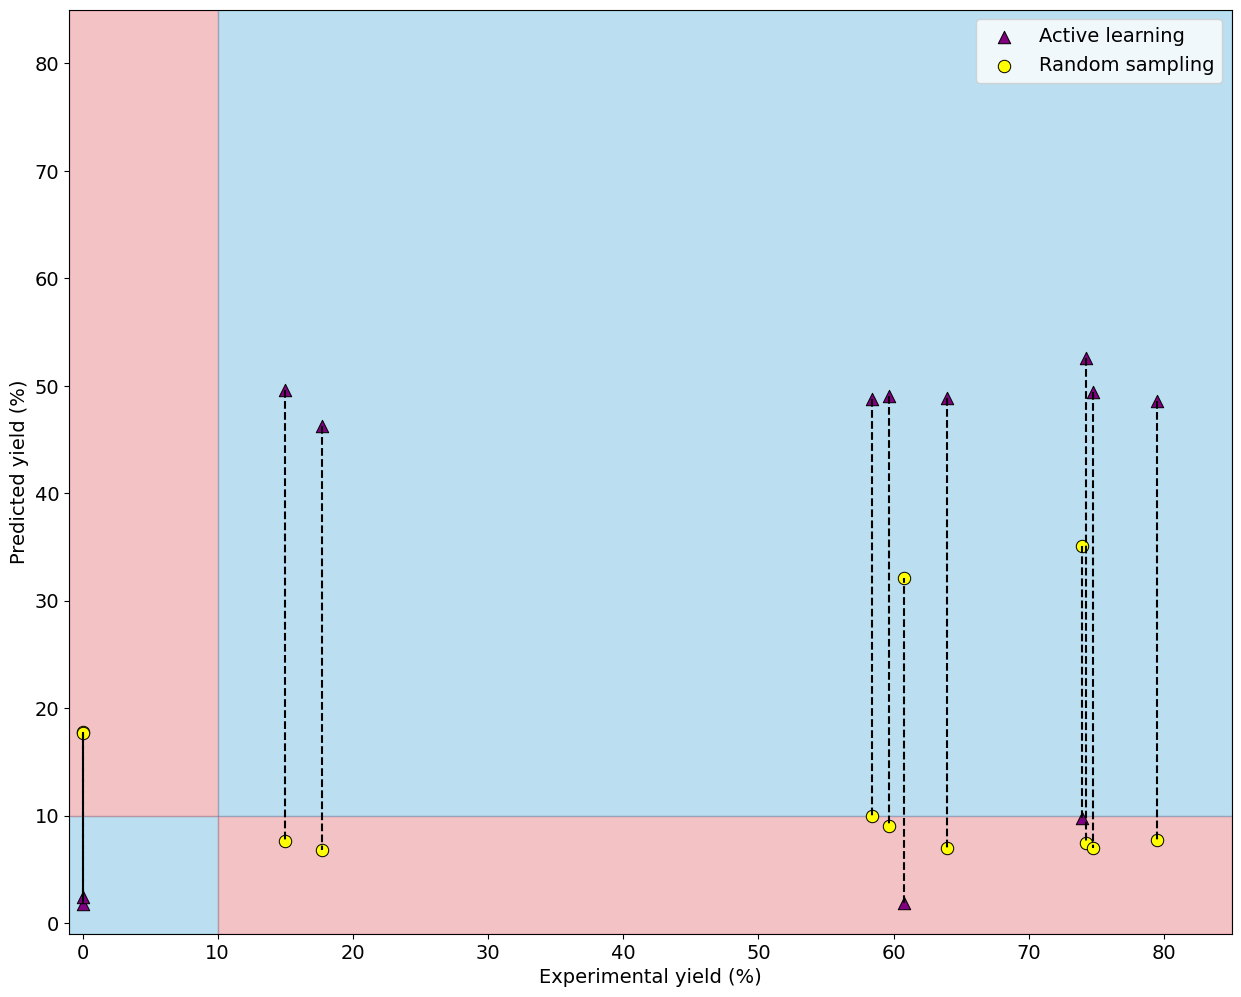

In [51]:
#plt.figure(figsize=(8,8))
lims = [-1, 85]
thresh = 10
fig, ax = plt.subplots(figsize=(15,12))
ax.fill_between([lims[0], thresh], [thresh, thresh], lims[0], alpha=0.3, color='#1F98D0')  # blue
ax.fill_between([thresh, lims[1]], [thresh, thresh], lims[0], alpha=0.3, color='#DA383D')  # yellow , red: 
ax.fill_between([lims[0], thresh], [lims[1], lims[1]], thresh, alpha=0.3, color='#DA383D')  # blue
ax.fill_between([thresh, lims[1]], [lims[1], lims[1]], thresh, alpha=0.3, color='#1F98D0')  # yellow , red: 
sns.scatterplot(data=dfm_alk, x=target, y=al_col, s=80, label="Active learning", marker="^", c="purple", edgecolor="black")
sns.scatterplot(data=dfm_alk, x=target, y=rand_col, s=80, label="Random sampling", c="yellow", edgecolor="black")
plt.vlines(dfm_alk[target], dfm_alk[al_col], dfm_alk[rand_col], color="black", ls='--')
plt.xlim(lims)
plt.ylim(lims)
plt.xlabel("Experimental yield (%)")
plt.ylabel("Predicted yield (%)")
plt.show()

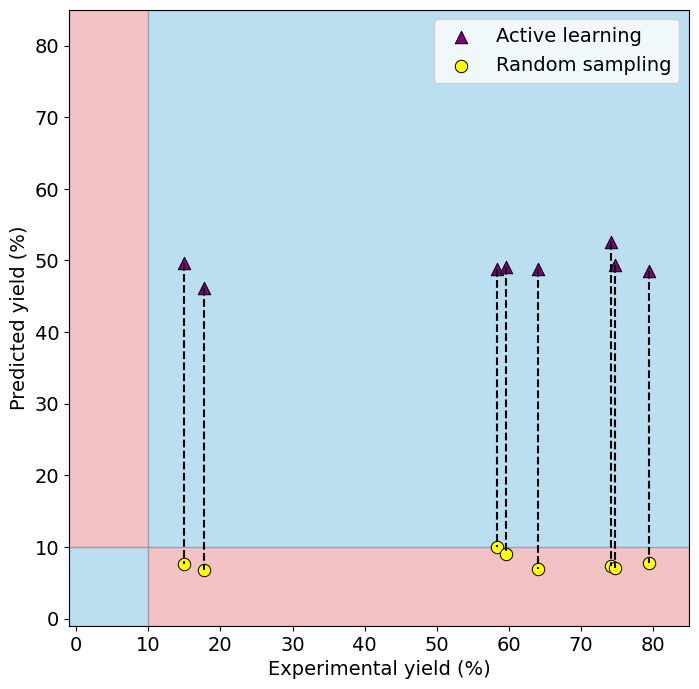

In [27]:
#plt.figure(figsize=(8,8))
lims = [-1, 85]
thresh = 10
df = dfm_alk[dfm_alk["AL_set"]]
fig, ax = plt.subplots(figsize=(8,8))
ax.fill_between([lims[0], thresh], [thresh, thresh], lims[0], alpha=0.3, color='#1F98D0')  # blue
ax.fill_between([thresh, lims[1]], [thresh, thresh], lims[0], alpha=0.3, color='#DA383D')  # yellow , red: 
ax.fill_between([lims[0], thresh], [lims[1], lims[1]], thresh, alpha=0.3, color='#DA383D')  # blue
ax.fill_between([thresh, lims[1]], [lims[1], lims[1]], thresh, alpha=0.3, color='#1F98D0')  # yellow , red: 
sns.scatterplot(data=df, x=target, y=al_col, s=80, label="Active learning", marker="^", c="purple", edgecolor="black")
sns.scatterplot(data=df, x=target, y=rand_col, s=80, label="Random sampling", c="yellow", edgecolor="black")
plt.vlines(df[target], df[al_col], df[rand_col], color="black", ls='--')
plt.xlim(lims)
plt.ylim(lims)
plt.xlabel("Experimental yield (%)")
plt.ylabel("Predicted yield (%)")
plt.show()


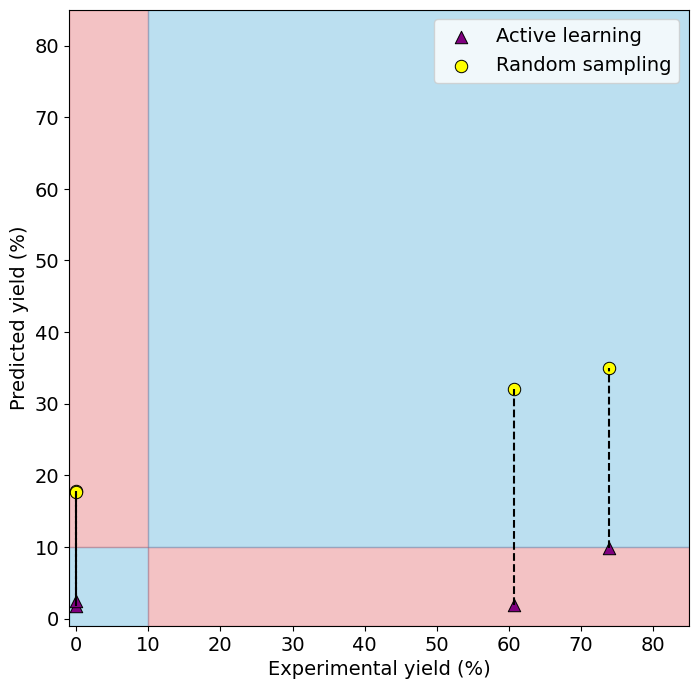

In [28]:
lims = [-1, 85]
thresh = 10
df = dfm_alk[~dfm_alk["AL_set"]]
fig, ax = plt.subplots(figsize=(8,8))
ax.fill_between([lims[0], thresh], [thresh, thresh], lims[0], alpha=0.3, color='#1F98D0')  # blue
ax.fill_between([thresh, lims[1]], [thresh, thresh], lims[0], alpha=0.3, color='#DA383D')  # yellow , red: 
ax.fill_between([lims[0], thresh], [lims[1], lims[1]], thresh, alpha=0.3, color='#DA383D')  # blue
ax.fill_between([thresh, lims[1]], [lims[1], lims[1]], thresh, alpha=0.3, color='#1F98D0')  # yellow , red: 
sns.scatterplot(data=df, x=target, y=al_col, s=80, label="Active learning", marker="^", c="purple", edgecolor="black")
sns.scatterplot(data=df, x=target, y=rand_col, s=80, label="Random sampling", c="yellow", edgecolor="black")
plt.vlines(df[target], df[al_col], df[rand_col], color="black", ls='--')
plt.xlim(lims)
plt.ylim(lims)
plt.xlabel("Experimental yield (%)")
plt.ylabel("Predicted yield (%)")
plt.show()

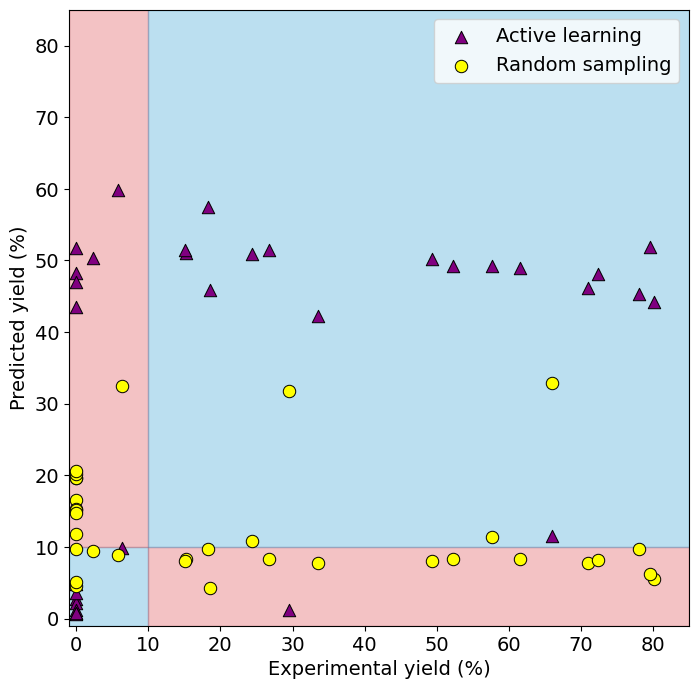

In [29]:
#plt.figure(figsize=(8,8))
lims = [-1, 85]
thresh = 10
fig, ax = plt.subplots(figsize=(8,8))
ax.fill_between([lims[0], thresh], [thresh, thresh], lims[0], alpha=0.3, color='#1F98D0')  # blue
ax.fill_between([thresh, lims[1]], [thresh, thresh], lims[0], alpha=0.3, color='#DA383D')  # yellow , red: 
ax.fill_between([lims[0], thresh], [lims[1], lims[1]], thresh, alpha=0.3, color='#DA383D')  # blue
ax.fill_between([thresh, lims[1]], [lims[1], lims[1]], thresh, alpha=0.3, color='#1F98D0')  # yellow , red: 
sns.scatterplot(data=dfm, x=target, y=al_col, s=80, label="Active learning", marker="^", c="purple", edgecolor="black")
sns.scatterplot(data=dfm, x=target, y=rand_col, s=80, label="Random sampling", c="yellow", edgecolor="black")
#plt.vlines(dfm_alk[target], dfm_alk[al_col], dfm_alk[rand_col], color="black", ls='--')
plt.xlim(lims)
plt.ylim(lims)
plt.xlabel("Experimental yield (%)")
plt.ylabel("Predicted yield (%)")
plt.show()

In [55]:
dfm[[target, al_col, rand_col, "smiles", "smiles_alkyl", "smiles_aryl", "rsmi"]].to_csv("/home/rickena1/modules/mcds-actlearn/notebooks/figure_scripts/figure_data/cross_pick_yields.csv")

In [48]:
dfm_alk[["yield_al_pred", "yield_rand_pred", target]]

,yield_al_pred,yield_rand_pred,CAD Percent Yield (%)
smiles_alkyl,,,
CNC(=O)C(F)Br,1.750778,17.780328,0.000000
COC(CBr)c1ccc(Cl)cc1,46.213452,6.800026,17.734937
COc1ccc(C2=NCC(CBr)S2)cc1,52.615944,7.406845,74.243154
COc1ccc(NC(=O)CCBr)cc1,48.761823,9.965509,58.404788
Cc1ccc(C)c(OCCCBr)c1,48.840668,6.980508,63.981793
Clc1ccc(C2(Cn3cncn3)CC(Br)CO2)c(Cl)c1,49.571190,7.608489,15.009789
Cn1c(=O)c2c(ncn2CCCBr)n(C)c1=O,49.409178,6.993010,74.781763
O=C1CC(Br)c2ccccc21,2.448238,17.663868,0.000000
O=C1c2ccccc2C(=O)N1CCCCCCCCCCBr,1.838899,32.110620,60.752269


In [29]:
thresh = 10
(dfm["yield_al_pred"] > thresh) & (dfm["CAD Percent Yield (%)"] > thresh).value

0      True
1      True
2      True
3      True
4     False
5     False
6      True
7      True
8      True
9      True
10     True
11     True
12    False
13     True
14    False
15    False
16     True
17     True
18     True
19     True
20    False
21     True
22     True
23     True
24     True
25     True
26     True
27     True
28     True
29     True
30    False
31    False
32    False
33     True
34     True
35    False
36    False
37    False
38    False
39    False
40    False
41    False
42    False
43    False
dtype: bool

In [ ]:

# plot f1 of various feature sets (using AL+Random and AL cores 1)
plt.subplots(1, 2, figsize=(12, 4))
plt.subplot(1, 2, 1)

sns.lineplot(data=dfm, x="Threshold", y="Precision", legend=False)


sns.scatterplot(data=chargestack_f1[chargestack_f1["charge_type"].isin(["FASM", "Mulliken", "Paboon", "Loewdin", "DFT"])], x="Threshold", y="f1", style="charge_type", hue="charge_type", legend=False, s=80)
plt.title(f"Core 1 test set predictions")
plt.ylabel(f"F$_1$ score")

plt.subplot(1, 2, 2)
sns.lineplot(data=chargestack_f2[chargestack_f1["charge_type"].isin(["FASM", "Mulliken", "Paboon", "Loewdin", "DFT"])], x="Threshold", y="f1", hue="charge_type", legend=False)
sns.scatterplot(data=chargestack_f2[chargestack_f1["charge_type"].isin(["FASM", "Mulliken", "Paboon", "Loewdin", "DFT"])], x="Threshold", y="f1", hue="charge_type", style="charge_type", s=80)
#plt.xlabel("Number of reactions")
plt.ylabel('')
plt.legend(loc=(1.1, 0.35))
plt.title("Core 2 test set predictions")
#plt.show()